In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 25)


In [101]:
# merge the 2 csv files and then make a list of dataframes that contains the data of each firm.

df = pd.read_csv("./doc.csv")
df_additional = pd.read_csv("./usfirms2022.csv", usecols=["Ticker", "Sector NAICS\nlevel 1", "Name"])
df = df.join(df_additional.set_index("Ticker"), on="firm")
merged = [y for _, y in df.groupby('firm', as_index=False)]

In [102]:

# firm size measures: 

for i in range(len(merged)):  # iterate through each dataframe on the list and calculate the formulas.

    merged[i]['lprice'] = merged[i].groupby(['firm'])['adjprice'].shift(4)
    merged[i]['r'] = np.log(merged[i]['adjprice'].astype(float)) - np.log(merged[i]['lprice'].astype(float))
    merged[i]['r2'] = np.log(merged[i]['adjprice'].astype(float)) - np.log(merged[i].groupby(['firm'])['adjprice'].shift(4).astype(float))
    merged[i].loc['ADT':'ADTN',['adjprice','lprice','r','r2']].iloc[85:96,]

    merged[i]['book_value'] = (merged[i]['totalassets'] - merged[i]['totalliabilities']  )
    merged[i]['market_value'] = (merged[i]['adjprice'].max() * merged[i]['stockholderequity'] )
    x = (merged[i]['originalprice'] * merged[i]['sharesoutstanding'] )

    #profit margin measures
    merged[i]['operating_profit'] = (merged[i]['revenue'] - merged[i]['cogs'] - merged[i]['sgae'])
    merged[i]['ebit'] = (merged[i]['revenue'] - merged[i]['cogs'] - merged[i]['sgae'] - merged[i]['otheropexp'])
    merged[i]['operating_profit_margin'] =  ( merged[i]['ebit'] / merged[i]['revenue'] )


In [103]:

# We want to make the analisis of the rolling year, so we collapse the last 4 values of the firm.

for i in range(len(merged)): 
    df = merged[i].tail(4) # get the last 4 values of the firm.

    dummy = merged[i].tail(1) # get the last value of the firm so we can extract some values.
    
    # temporaly store some values to then added to the final dataframe.

    totalassets = list(dummy['totalassets'])[0]
    totalliabilities = list(dummy['totalliabilities'])[0]
    shortdebt = list(dummy['shortdebt'])[0]
    longdebt = list(dummy['longdebt'])[0]
    stockholderequity = list(dummy['stockholderequity'])[0]
    adjprice = list(dummy['adjprice'])[0]
    originalprice = list(dummy['originalprice'])[0]
    book_value = list(dummy['book_value'])[0]
    market_value = list(dummy['market_value'])[0]
    operating_profit = list(dummy['operating_profit'])[0]
    ebit = list(dummy['ebit'])[0]
    operating_profit_margin = list(dummy['operating_profit_margin'])[0]
    sharesoutstanding = list(dummy['sharesoutstanding'])[0]
    naics = list(dummy['Sector NAICS\nlevel 1'])[0]
    Name = list(dummy['Name'])[0]

    # collapse the last 4 values of the firm.
    newDf = df.groupby('firm', as_index=False).agg({'revenue':'sum', 'cogs':'sum', 'cogs':'sum', 'sgae':'sum', 'otheropexp':'sum', 'extraincome':'sum', 'finexp':'sum', 'incometax': 'sum'}) 

    # add the stored values to the new dataframe of the firm.
    newDf['totalassets'] = totalassets
    newDf['totalliabilities'] = totalliabilities
    newDf['shortdebt'] = shortdebt
    newDf['longdebt'] = longdebt
    newDf['stockholderequity'] = stockholderequity
    newDf['adjprice'] = adjprice
    newDf['originalprice'] = originalprice
    newDf['sharesoutstanding'] = sharesoutstanding
    newDf['book_value'] = book_value
    newDf['market_value'] = market_value
    newDf['operating_profit'] = operating_profit
    newDf['operating_profit_margin'] = operating_profit_margin
    newDf['ebit'] = ebit
    newDf['Sector NAICS\nlevel 1'] = naics
    newDf['Name'] = Name

    merged[i] = newDf # replace the new firm df on the index of the list of all firms dataframes.
    

In [104]:
# because we have a list of dataframes, we want to make only 1 dataframe with n rows of the abstract of each firm.
# we get each row of each dataframe in the list and appended to a new df.
# finally we get only 1 dataframe of n rows wich n row is the abstract of each firm. 
collapsed_dataframes = pd.DataFrame()
for df in merged:
    collapsed_dataframes = collapsed_dataframes.append(df, ignore_index=True)
collapsed_dataframes # print the final dataframe to visualize better.

C:\Users\bobad\AppData\Local\Temp\ipykernel_16164\3638414591.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  collapsed_dataframes = collapsed_dataframes.append(df, ignore_index=True)


,firm,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,adjprice,originalprice,sharesoutstanding,book_value,market_value,operating_profit,operating_profit_margin,ebit,Sector NAICS\nlevel 1,Name
0,A,6527000.0,3004000.0,2.056000e+06,0.0,41000.000000,81000.000,164000.0,1.045500e+07,5.333000e+06,...,118.560000,118.7700,298708.056,5122000.000,8.139299e+08,3.600000e+05,0.224020,3.600000e+05,Manufacturing,"Agilent Technologies, Inc"
1,AA,13386000.0,9653000.0,8.930000e+05,1138000.0,271000.000000,141000.000,869000.0,1.570900e+07,8.417000e+06,...,45.487956,45.5800,184448.686,7292000.000,6.540498e+08,6.570000e+05,0.200878,7.320000e+05,Manufacturing,Alcoa Corp
2,AAIC,31855.0,15523.0,0.000000e+00,0.0,-10809.000000,0.000,4333.0,1.084755e+06,8.710570e+05,...,3.250000,3.2500,35016.392,213698.000,2.172580e+07,4.526000e+03,0.415229,4.526000e+03,Finance and Insurance,Arlington Asset Investment Corp
3,AAL,40717000.0,0.0,4.160800e+07,0.0,251000.000000,1828000.000,-546000.0,6.796300e+07,7.638500e+07,...,12.680000,12.6800,649514.848,-8422000.000,-4.279606e+08,1.017000e+06,0.075771,1.017000e+06,Transportation and Warehousing,American Airlines Group Inc
4,AAME,195299.0,0.0,1.915230e+05,0.0,0.000000,0.000,863.0,3.792740e+05,2.701730e+05,...,2.670000,2.6700,20398.497,109101.000,5.262433e+05,-2.115000e+03,-0.047348,-2.115000e+03,Finance and Insurance,Atlantic American Corp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,ZVIA,156702.0,93921.0,8.744600e+04,94595.0,51341.000000,0.000,55.0,1.127380e+05,2.553900e+04,...,2.810000,2.8100,67209.461,87199.000,1.003660e+06,-6.700000e+03,-0.323723,-1.474300e+04,Manufacturing,Zevia Pbc
3603,ZVO,230001.0,149303.0,1.118000e+05,5753.0,-3980.000000,0.000,98.0,8.543300e+04,7.882800e+04,...,0.970100,0.9701,34095.968,6605.000,1.651250e+05,-9.723000e+03,-0.016368,-8.410000e+02,Educational Services,Zovio Inc
3604,ZWS,340300.0,195100.0,1.196000e+05,3400.0,50400.000000,22000.000,-13700.0,1.176300e+06,9.469000e+05,...,27.179735,27.2400,125967.533,229400.000,8.315018e+06,5.380000e+04,0.188248,5.350000e+04,Manufacturing,Zurn Elkay Water Solutions Corp
3605,ZY,14546.0,48949.0,2.327660e+05,69138.0,-2028.000000,26572.000,44.0,4.709680e+05,2.343450e+05,...,1.230000,1.2300,103140.755,236623.000,9.467286e+06,-6.573600e+04,-40.317388,-1.061960e+05,"Professional, Scientific, and Technical Services",Zymergen Inc


What is the composition of US public firms in terms of size, sales performance and profitability?

- We can see from the graphs from below that for some of the firms the size is above 0.5 and for the rest there are below 0.2.

- For the sales we can see more activity with some of the firms above 2.5. For the rest of the firms they stay between 0 and 0.2

- For the profitability we can see that only a few ones go above 2.0 and the majority of the firms are in a range between 0 and 0.2.

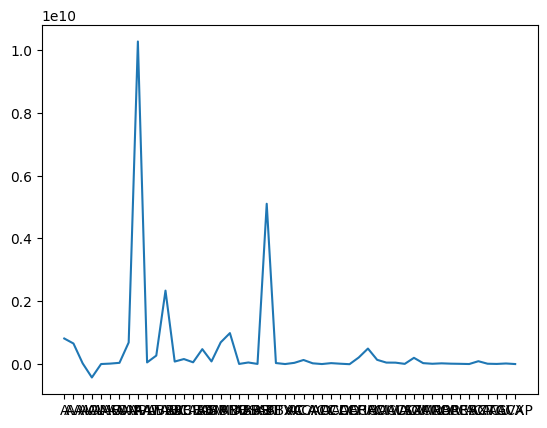

In [105]:
# getting the size of the firms 

df = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['market_value'].agg('sum')).reset_index()
df
plt.plot(df['firm'][0:50],df['market_value'][0:50] )


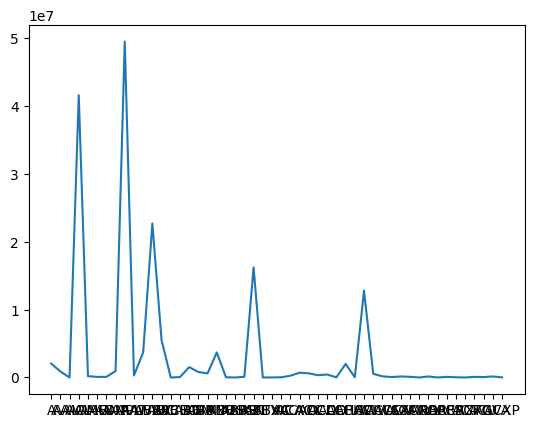

In [106]:
# getting the sales of the firms 

df = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['sgae'].agg('sum')).reset_index()
df
plt.plot(df['firm'][0:50],df['sgae'][0:50] )

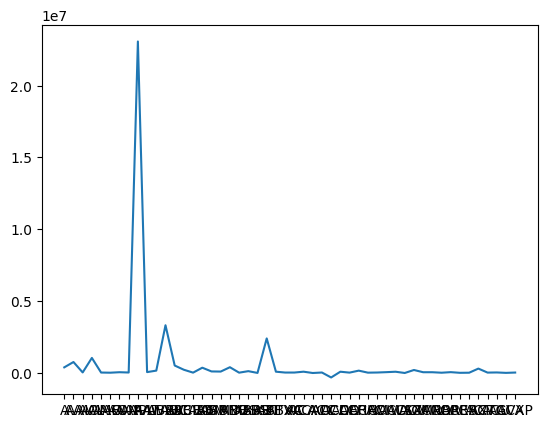

In [107]:
# getting the profitability of the firms 

df = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['ebit'].agg('sum')).reset_index()
df
plt.plot(df['firm'][0:50],df['ebit'][0:50] )

Why some firms are more profitable than others? Which factors/variables are related to profitability?

- The definition of profitability is the extent to which its total income exceeds its total expenses for any given period. 

- To calculate the profitability of a company we can take the next formula: Total Revenue - Total Expenses

- So the things that can affect the profitability of a company can be the number of production units, production per unit, direct and indirect costs, etc.

Show how many firms by industry there are in the sample 

 - We can see that the sector that has more firms is the Manufacturing sector with 1565 firms, and the one with the least is Educational services with 14 firms.

 - Also we can see an increment of firms pass by the information industry.
 - Below information industry all the industries stay below 200.

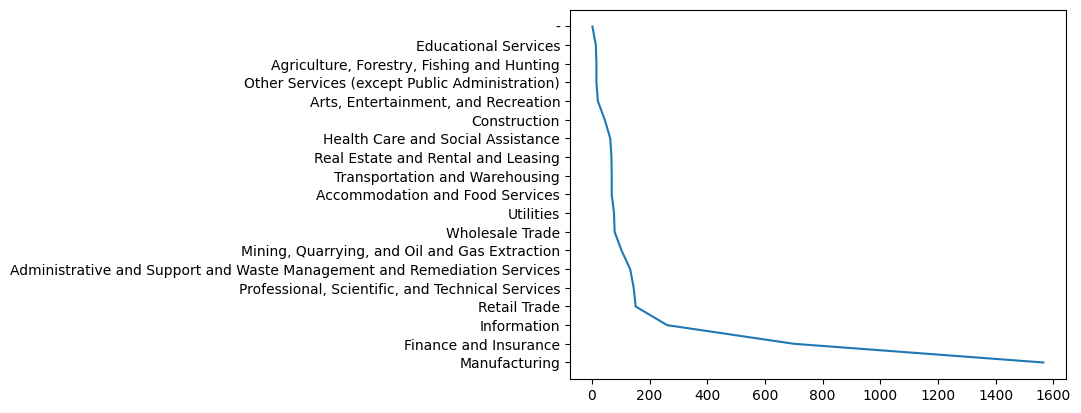

In [108]:
firms_by_industry = collapsed_dataframes.groupby('Sector NAICS\nlevel 1') # group all the firms by sector
firms_by_industry = pd.DataFrame(firms_by_industry['Sector NAICS\nlevel 1'].count().sort_values(ascending=False)) # count all the firms on each sector
firms_by_industry = firms_by_industry.rename(columns={"Sector NAICS\nlevel 1": "# firms"}) 
firms_by_industry = firms_by_industry.reset_index()
plt.plot(firms_by_industry['# firms'], firms_by_industry['Sector NAICS\nlevel 1'])


For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

- The first thing that i see is that the  market value and the book value of each of the indistries differ a lot in some industries, in someones the market value is the triple of the book value like Manufacturing, and in other is the double. 

- The other thing that we see based on the graph is that the market value and book value doesn't differ a lot in some of the industries, in fact we can see the 2 lines somehow converge and stay for almost all of the firms.

- Also we can see that some industries have a negative market value but a "stable" book value.

,Sector NAICS\nlevel 1,market_value,book_value
0,Manufacturing,9.918256e+11,3.635015e+09
1,"Professional, Scientific, and Technical Services",6.334235e+11,3.449484e+09
2,Finance and Insurance,6.248129e+11,1.036435e+09
3,Information,1.833772e+11,5.432704e+08
4,Administrative and Support and Waste Managemen...,7.600424e+10,5.028128e+08
5,Retail Trade,6.750233e+10,5.002175e+08
6,Utilities,4.511864e+10,3.496151e+08
7,Wholesale Trade,2.878474e+10,3.245564e+08
8,Construction,2.862252e+10,2.334237e+08
9,Real Estate and Rental and Leasing,2.465113e+10,1.180439e+08


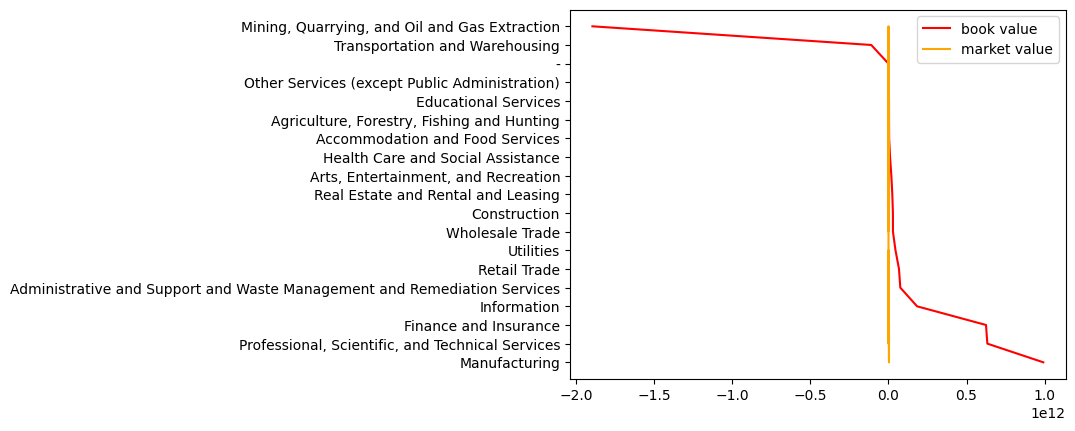

In [109]:


industries_market_value = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['market_value'].agg('sum'))
industries_book_value = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['book_value'].agg('sum'))

industries_market_value = pd.DataFrame(industries_market_value['market_value'].sort_values(ascending=False))
industries_book_value = pd.DataFrame(industries_book_value['book_value'].sort_values(ascending=False))

industries_market_value = industries_market_value.reset_index()
industries_book_value = industries_book_value.reset_index()


x = industries_market_value['Sector NAICS\nlevel 1']
y = industries_market_value['market_value']

x2 = industries_book_value['Sector NAICS\nlevel 1']
y2 = industries_book_value['book_value']

plt.plot(y,x, color="red")
plt.plot(y2,x2,color ='orange')
plt.legend(['book value', 'market value'])
industries_market_value['book_value'] = industries_book_value['book_value'] # merge book value and market value on 1 dataframe
industries_market_value



For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

- We can see that there are only 2 industries that have a profit margin more than 1.0 which are "Accommodation and Food Services" and "Construction" with 6.9 and 4.6 respectively.

- Also we can see that there are a lot of industries with a profit margin between 0 and 1. 

- There is a industry with a profit margin of -13.578666. 

,Sector NAICS\nlevel 1,operating_profit_margin
0,Accommodation and Food Services,6.948798
1,Construction,4.681278
2,Wholesale Trade,0.968937
3,"Arts, Entertainment, and Recreation",0.731669
4,Transportation and Warehousing,0.688176
5,Other Services (except Public Administration),0.606959
6,-,0.463653
7,Educational Services,-0.023139
8,"Agriculture, Forestry, Fishing and Hunting",-0.250904
9,Retail Trade,-0.951040


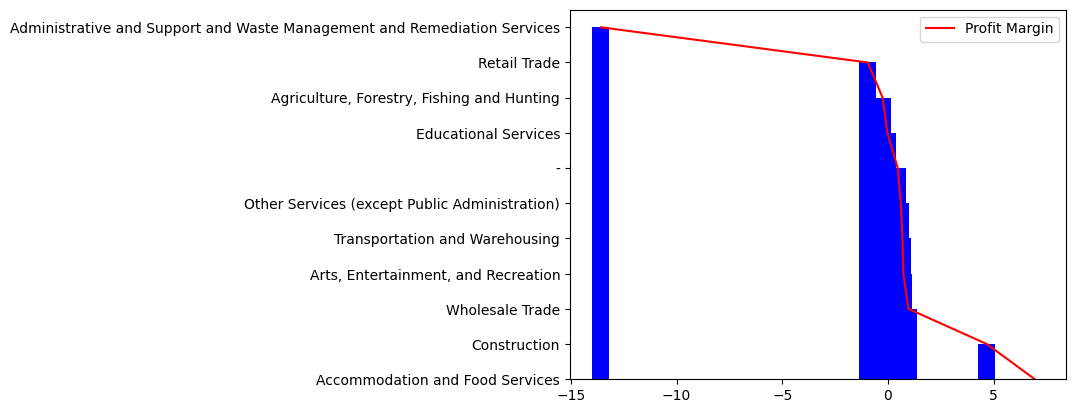

In [110]:
industries_profit_margin = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['operating_profit_margin'].agg('sum'))
industries_profit_margin = pd.DataFrame(industries_profit_margin['operating_profit_margin'].sort_values(ascending=False))
industries_profit_margin = industries_profit_margin.reset_index()

x = industries_profit_margin['Sector NAICS\nlevel 1']
y = industries_profit_margin['operating_profit_margin']

plt.plot(y,x, color="red")
plt.legend(['Profit Margin'])

plt.bar(y,x, color="blue")
plt.legend(['Profit Margin'])

industries_profit_margin

Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

- Based on the comparison of the market value of each firm vs the mean of the market value of a US firm on the next dataframe we can see that half of this 10 firms are above the size, and the other half are under the typical size. 

In [111]:
typical_size_of_USFirm = collapsed_dataframes["market_value"].mean()
print(f"Typical size of firm: {typical_size_of_USFirm}")
biggest_firms_market_value = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['market_value'].agg('sum'))
biggest_firms_market_value = pd.DataFrame(biggest_firms_market_value['market_value'].sort_values(ascending=False).reset_index())[0:10]
biggest_firms_market_value['more/less than typical size firm'] = (biggest_firms_market_value['market_value'] - typical_size_of_USFirm )
biggest_firms_market_value

Typical size of firm: 72674032067.06265


,firm,market_value,more/less than typical size firm
0,BRK_A,2.439537e+14,2.438810e+14
1,INPX,5.247536e+11,4.520796e+11
2,TNXP,2.922010e+11,2.195269e+11
3,C,8.416117e+10,1.148713e+10
4,GEVO,7.845738e+10,5.783346e+09
5,CHK,6.383992e+10,-8.834108e+09
6,AIG,5.952997e+10,-1.314406e+10
7,MSFT,5.564783e+10,-1.702621e+10
8,NUWE,5.154638e+10,-2.112765e+10
9,JPM,4.553745e+10,-2.713659e+10


To make a more complete analysis and understand the why these numbers of these firms we could see to which industry they belong as in the following table:

- Here i don't know why it doesn't appear the first firm wich is BRK_A, but we can see that the industry that repeats the most is Finance and Insurance with 4 ocurrences, and the industry that follows is Manufacturing with 3 ocurrences. 

- With this information we can see that the industry that have more firms that are on the top 10 of market value is Finance and Insurance. 

- Also we can see that the industries that have less firms that are on the top 10 of market value are Finance and Insurance, Mining, Quarrying, and Oil and Gas Extraction and Information. 

Typical size of firm: 72674032067.06265


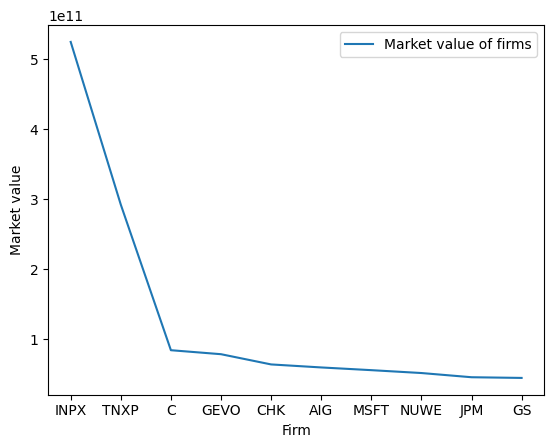

In [112]:
typical_size_of_USFirm = collapsed_dataframes["market_value"].mean()
print(f"Typical size of firm: {typical_size_of_USFirm}")
biggest_firms_market_value = pd.DataFrame(collapsed_dataframes.groupby(['firm', 'Sector NAICS\nlevel 1'])['market_value'].agg('sum'))
biggest_firms_market_value = pd.DataFrame(biggest_firms_market_value['market_value'].sort_values(ascending=False).reset_index())[0:10]
biggest_firms_market_value['more/less than typical size firm'] = (biggest_firms_market_value['market_value'] - typical_size_of_USFirm )
biggest_firms_market_value
plt.plot(biggest_firms_market_value['firm'], biggest_firms_market_value['market_value'])
plt.ylabel('Market value')
plt.xlabel('Firm')
plt.legend(['Market value of firms'])

Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

- Following the same process with the question above, we can see that all the firms are above the size of the typical firms of the US. 

In [113]:
typical_size_of_USFirm = collapsed_dataframes["book_value"].mean()
print(f"Typical size of firm: {typical_size_of_USFirm}")
biggest_firms_book_value = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['book_value'].agg('sum'))
biggest_firms_book_value = pd.DataFrame(biggest_firms_book_value['book_value'].sort_values(ascending=False).reset_index())[0:10]
biggest_firms_book_value['more/less than typical size firm'] = (biggest_firms_book_value['book_value'] - typical_size_of_USFirm )
biggest_firms_book_value

Typical size of firm: 3465162.6027016034


,firm,book_value,more/less than typical size firm
0,BRK_A,461229000.0,4.577638e+08
1,JPM,286143000.0,2.826778e+08
2,BAC,269118000.0,2.656528e+08
3,GOOGL,255419000.0,2.519538e+08
4,C,199626000.0,1.961608e+08
5,XOM,184508000.0,1.810428e+08
6,WFC,179793000.0,1.763278e+08
7,MSFT,166542000.0,1.630768e+08
8,CVX,154562000.0,1.510968e+08
9,T,135307000.0,1.318418e+08


With the information below, we can see that the industry that repeats the most is also Finance and Insurance with also 4 ocurrences.

The least repeated industry is "Professional, Scientific, and Technical Services" and "Retail Trade	" with 1 ocurrence each.

Typical size of firm: 3465162.6027016034


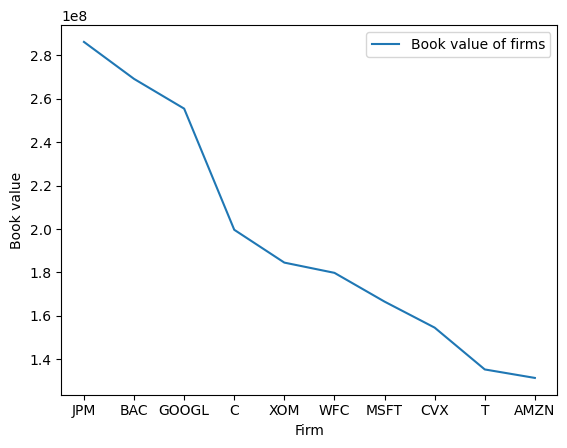

In [114]:
typical_size_of_USFirm = collapsed_dataframes["book_value"].mean()
print(f"Typical size of firm: {typical_size_of_USFirm}")
biggest_firms_book_value = pd.DataFrame(collapsed_dataframes.groupby(['firm', 'Sector NAICS\nlevel 1'])['book_value'].agg('sum'))
biggest_firms_book_value = pd.DataFrame(biggest_firms_book_value['book_value'].sort_values(ascending=False).reset_index())[0:10]
biggest_firms_book_value['more/less than typical size firm'] = (biggest_firms_book_value['book_value'] - typical_size_of_USFirm )
biggest_firms_book_value
plt.plot(biggest_firms_book_value['firm'], biggest_firms_book_value['book_value'])

plt.ylabel('Book value')
plt.xlabel('Firm')
plt.legend(['Book value of firms'])

To abstract this 2 plots, we plotted the market value and book value side by side getting the following plot.

- We can see that the book value is gradually declining, while the market value has a sudden drop with the 3rd firm and stays like that for the rest of firms.

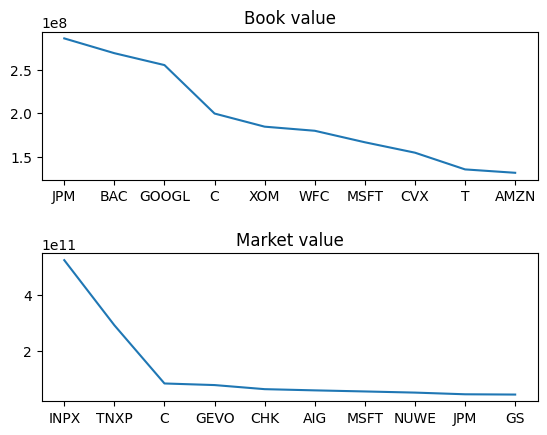

In [115]:


fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(biggest_firms_book_value['firm'], biggest_firms_book_value['book_value'])
ax1.set_title('Book value')
ax2.plot(biggest_firms_market_value['firm'], biggest_firms_market_value['market_value'])
ax2.set_title('Market value')
fig.subplots_adjust(hspace=.5)

2.2.1.2 Considering the whole history of financial data for all firms

How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics

In [116]:
df = pd.read_csv("./doc.csv")
df_additional = pd.read_csv("./usfirms2022.csv", usecols=["Ticker", "Sector NAICS\nlevel 1", "Name"])
df = df.join(df_additional.set_index("Ticker"), on="firm")

df['lprice'] = df.groupby(['firm'])['adjprice'].shift(4)
df['r'] = np.log(df['adjprice'].astype(float)) - np.log(df['lprice'].astype(float))
df['r2'] = np.log(df['adjprice'].astype(float)) - np.log(df.groupby(['firm'])['adjprice'].shift(4).astype(float))
df.loc['ADT':'ADTN',['adjprice','lprice','r','r2']].iloc[85:96,]
df['book_value'] = (df['totalassets'] - df['totalliabilities']  )
df['market_value'] = (df['adjprice'].max() * df['stockholderequity'] )
df['operating_profit'] = (df['revenue'] - df['cogs'] - df['sgae'])
df['ebit'] = (df['revenue'] - df['cogs'] - df['sgae'] - df['otheropexp'])
df['operating_profit_margin'] =  ( df['ebit'] / df['revenue'] )
df



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Name,Sector NAICS\nlevel 1,lprice,r,r2,book_value,market_value,operating_profit,ebit,operating_profit_margin
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Agilent Technologies, Inc",Manufacturing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,"Agilent Technologies, Inc",Manufacturing,NaN,NaN,NaN,4642000.000,3.254840e+14,214000.0000,214000.0000,0.086117
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,"Agilent Technologies, Inc",Manufacturing,NaN,NaN,NaN,4902000.000,3.437145e+14,210000.0000,210000.0000,0.078652
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,"Agilent Technologies, Inc",Manufacturing,NaN,NaN,NaN,5265000.000,3.691670e+14,458000.0000,458000.0000,0.135824
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,"Agilent Technologies, Inc",Manufacturing,63.76167,-1.219152,-1.219152,5541000.000,3.885193e+14,279000.0000,279000.0000,0.098205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,"Zynerba Pharmaceuticals, Inc",Manufacturing,3.31000,0.247615,0.247615,78686.999,5.517311e+12,-10210.6520,-10210.6520,-inf
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,"Zynerba Pharmaceuticals, Inc",Manufacturing,3.30000,-0.136132,-0.136132,70913.334,4.972244e+12,-8836.4365,-8836.4365,-inf
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,"Zynerba Pharmaceuticals, Inc",Manufacturing,4.65000,-0.819027,-0.819027,65166.970,4.569325e+12,-8903.9150,-8903.9150,-inf
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,...,"Zynerba Pharmaceuticals, Inc",Manufacturing,5.29000,-1.534790,-1.534790,57241.873,4.013639e+12,-9168.7695,-9168.7695,-inf


In [117]:

historical_info = df # print the final dataframe to visualize better.
historical_info

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Name,Sector NAICS\nlevel 1,lprice,r,r2,book_value,market_value,operating_profit,ebit,operating_profit_margin
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Agilent Technologies, Inc",Manufacturing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,"Agilent Technologies, Inc",Manufacturing,NaN,NaN,NaN,4642000.000,3.254840e+14,214000.0000,214000.0000,0.086117
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,"Agilent Technologies, Inc",Manufacturing,NaN,NaN,NaN,4902000.000,3.437145e+14,210000.0000,210000.0000,0.078652
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,"Agilent Technologies, Inc",Manufacturing,NaN,NaN,NaN,5265000.000,3.691670e+14,458000.0000,458000.0000,0.135824
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,"Agilent Technologies, Inc",Manufacturing,63.76167,-1.219152,-1.219152,5541000.000,3.885193e+14,279000.0000,279000.0000,0.098205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,"Zynerba Pharmaceuticals, Inc",Manufacturing,3.31000,0.247615,0.247615,78686.999,5.517311e+12,-10210.6520,-10210.6520,-inf
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,"Zynerba Pharmaceuticals, Inc",Manufacturing,3.30000,-0.136132,-0.136132,70913.334,4.972244e+12,-8836.4365,-8836.4365,-inf
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,"Zynerba Pharmaceuticals, Inc",Manufacturing,4.65000,-0.819027,-0.819027,65166.970,4.569325e+12,-8903.9150,-8903.9150,-inf
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,...,"Zynerba Pharmaceuticals, Inc",Manufacturing,5.29000,-1.534790,-1.534790,57241.873,4.013639e+12,-9168.7695,-9168.7695,-inf


Calculate and explain earnings per share deflated by price.

- The formula to calculate the EPS is first getting the net income and then divide this net income by the shareoutstanding of the row.

In [118]:
historical_info['net income'] = (historical_info['revenue'] - historical_info['cogs'] - historical_info['sgae'] - historical_info['otheropexp'] -historical_info['incometax'] - historical_info['finexp'] - historical_info['extraincome'])
historical_info['earnings per share'] = (historical_info['net income'] / historical_info['sharesoutstanding'])
historical_info

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,lprice,r,r2,book_value,market_value,operating_profit,ebit,operating_profit_margin,net income,earnings per share
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,NaN,NaN,NaN,4642000.000,3.254840e+14,214000.0000,214000.0000,0.086117,82000.000000,0.181307
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,NaN,NaN,NaN,4902000.000,3.437145e+14,210000.0000,210000.0000,0.078652,99000.000000,0.218536
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,NaN,NaN,NaN,5265000.000,3.691670e+14,458000.0000,458000.0000,0.135824,285000.000000,0.624498
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,63.76167,-1.219152,-1.219152,5541000.000,3.885193e+14,279000.0000,279000.0000,0.098205,166000.000000,0.363422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,3.31000,0.247615,0.247615,78686.999,5.517311e+12,-10210.6520,-10210.6520,-inf,-9828.977250,-0.238269
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,3.30000,-0.136132,-0.136132,70913.334,4.972244e+12,-8836.4365,-8836.4365,-inf,-8848.941406,-0.214689
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,4.65000,-0.819027,-0.819027,65166.970,4.569325e+12,-8903.9150,-8903.9150,-inf,-9125.123110,-0.214977
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,...,5.29000,-1.534790,-1.534790,57241.873,4.013639e+12,-9168.7695,-9168.7695,-inf,-8301.150640,-0.190411


We can see with the dataframe below, that there are a lot of eps that have a value approximately of 4.3e+04.
Also we can see that the max value of a eps is 4.54e+08 and the minimum value, which is a negative one, have a value of -7.58e+08. This means that this company maybe doesn't have a very much market value.

In [119]:
pd.DataFrame(historical_info['earnings per share'].describe())

,earnings per share
count,1.558870e+05
mean,4.392471e+04
std,4.407366e+06
min,-7.582510e+08
25%,-6.232895e-02
50%,2.897569e-01
75%,8.699668e-01
max,4.547000e+08




Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.

- First we group the 2 industries that belong to me, in this case there are 2: Retail and Wholesale trade.
- After we have the data grouped in 1 only dataframe we calculate the R quarterly by calculating it annually.

In [120]:
# Getting the info of the 2 industries
only_industry_retail = historical_info.loc[historical_info['Sector NAICS\nlevel 1'] == 'Retail Trade']
only_industry_wholesale = historical_info.loc[historical_info['Sector NAICS\nlevel 1'] == 'Wholesale Trade']
only_industry = pd.concat([only_industry_retail, only_industry_wholesale]) # merging into 1 only DF
only_industry['R'] = np.log(only_industry['adjprice']) - np.log(only_industry['adjprice'].shift(4)) # calculating r


Here what we want to do is scale the data of the dates to be able to transform them and have a scale between each quarter of whether the company is classified as small, medium or large.

- The first thing that was done was to group by quarters to later change the format of the column of the quarters by real dates to later make the division by 3 quartiles and that would generate the division of the size of the companies.

In [121]:

# group by quarter
only_industry['date'] = pd.to_datetime(only_industry['q'])

# create a copy to use later
copy = only_industry[['firm','Name','R','date']].sort_values(by='date',ascending=True)

# create 4 labels, a is a dummy label that help us to divide the companies.
cut = pd.cut(np.array(only_industry['R']), 4, labels=["a","small", "medium", "big"])
only_industry['size'] = pd.DataFrame(cut)
only_industry = only_industry.set_index('date')
only_industry = only_industry.dropna()
only_industry

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,r2,book_value,market_value,operating_profit,ebit,operating_profit_margin,net income,earnings per share,R,size
date,,,,,,,,,,,,,,,,,,,,,
2002-10-01,AAP,2002q4,702417.0,389607.0,269884.0,9090.0,-3203.0,15485.0,6529.0,1965225.0,...,-0.017233,468356.0,3.283981e+13,42926.0,33836.0,0.048171,15025.0,0.420956,-0.017233,medium
2003-07-01,AAP,2003q3,849323.0,460579.0,306868.0,2522.0,13.0,5935.0,28268.0,2011249.0,...,0.295896,597287.0,4.188008e+13,81876.0,79354.0,0.093432,45138.0,1.229986,0.295896,medium
2003-10-01,AAP,2003q4,771668.0,404990.0,308684.0,1624.0,-410.0,4892.0,19796.0,1983071.0,...,0.509598,631244.0,4.426105e+13,57994.0,56370.0,0.073050,32092.0,0.869490,0.509598,medium
2004-07-01,AAP,2004q3,908412.0,486110.0,331055.0,0.0,-152.0,4531.0,33329.0,2125947.0,...,-0.030067,759748.0,5.327139e+13,91247.0,91247.0,0.100447,53539.0,0.715117,-0.030067,medium
2005-07-01,AAP,2005q3,1023146.0,541096.0,369530.0,0.0,1045.0,7575.0,40061.0,2508731.0,...,0.522731,870417.0,6.103119e+13,112520.0,112520.0,0.109975,63839.0,0.583185,0.522731,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,ANDE,2021q2,3273726.0,3099682.0,0.0,109976.0,3527.0,13454.0,10642.0,4049089.0,...,0.832528,1224964.0,8.589103e+13,174044.0,64068.0,0.019570,36445.0,1.096689,0.832528,medium
2021-07-01,ANDE,2021q3,2998824.0,2876989.0,0.0,110275.0,17004.0,8799.0,4027.0,3708142.0,...,0.499850,1236013.0,8.666576e+13,121835.0,11560.0,0.003855,-18270.0,-0.548933,0.499850,medium
2021-10-01,ANDE,2021q4,3782702.0,3588688.0,0.0,119240.0,-25525.0,8444.0,11163.0,4569219.0,...,0.479215,1307704.0,9.169253e+13,194014.0,74774.0,0.019767,80692.0,2.424188,0.479215,medium


Once we had the company ratings, we needed to convert these string values to numeric values so the linear regression model could read them.

For this, One Hot Encoding was used to convert these values into zeros and ones and be able to perform the transformation.

In [122]:
from sklearn import preprocessing
cols = only_industry[['size']]
a = only_industry[['size']]
print(cols)

le = preprocessing.LabelEncoder()

cols = cols.apply(le.fit_transform)
a = preprocessing.OneHotEncoder()
a.fit(cols)
one_hot_labels = a.transform(cols).toarray()



              size
date              
2002-10-01  medium
2003-07-01  medium
2003-10-01  medium
2004-07-01  medium
2005-07-01  medium
...            ...
2021-04-01  medium
2021-07-01  medium
2021-10-01  medium
2022-01-01  medium
2022-04-01  medium

[377 rows x 1 columns]


Here we are left with the dataframe of the labels converted to zeros and ones.

In [123]:
col_names = a.get_feature_names_out(list(cols.columns))
col_names = pd.DataFrame(one_hot_labels, columns = col_names)
col_names = col_names.drop(columns=['size_0'])
col_names

,size_1,size_2
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
372,1.0,0.0
373,1.0,0.0
374,1.0,0.0
375,1.0,0.0


We perform a reset_index to have the table arranged perfectly.

In [124]:
#sample_train_data = sample_train_data.reset_index()
only_industry = only_industry.reset_index()

We join this data with the original data table.

In [125]:

sample_train_data = only_industry.drop(columns = cols.columns)
sample_train_data = only_industry.join(col_names)
only_industry = sample_train_data

Once we already had our clean and scaled dataset, we proceeded to make a heat map of the correlations of the variables to be able to choose the ones that have the most correlation with the "R" value and that our model is balanced.

In [126]:
corr = only_industry.corr()
corr.style.background_gradient(cmap='coolwarm')

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,lprice,r,r2,book_value,market_value,operating_profit,ebit,operating_profit_margin,net income,earnings per share,R,size_1,size_2
revenue,1.000000,0.963901,0.843203,0.148006,0.071960,0.850360,0.390829,0.914353,0.940591,-0.162385,0.840872,0.831022,0.480169,0.806873,0.427763,-0.006038,0.231980,-0.006887,0.459525,0.092044,0.092044,0.831022,0.831022,0.657120,0.749034,0.016702,0.512070,0.303669,0.092044,-0.074199,-0.006970
cogs,0.963901,1.000000,0.674561,0.150444,0.072641,0.709370,0.308762,0.777493,0.819374,-0.149659,0.682017,0.661368,0.477436,0.651963,0.353577,-0.005103,0.226138,-0.005824,0.459606,0.086322,0.086322,0.661368,0.661368,0.551660,0.602419,-0.008520,0.401577,0.231713,0.086322,-0.129980,0.012915
sgae,0.843203,0.674561,1.000000,-0.011458,0.052472,0.932814,0.425639,0.979831,0.968066,-0.141027,0.973874,0.982777,0.391282,0.917898,0.488649,-0.003451,0.196604,-0.003570,0.379242,0.064737,0.064737,0.982777,0.982777,0.617072,0.855052,0.059845,0.610123,0.366693,0.064737,0.046932,-0.040289
otheropexp,0.148006,0.150444,-0.011458,1.000000,-0.018361,0.109421,0.001916,0.092449,0.108139,-0.115763,0.017628,0.053868,-0.088637,0.088851,0.102641,0.013049,-0.008703,0.000011,-0.106798,0.080209,0.080209,0.053868,0.053868,0.683881,-0.073305,-0.073038,-0.059614,-0.171675,0.080209,0.034795,-0.027938
extraincome,0.071960,0.072641,0.052472,-0.018361,1.000000,0.019987,0.435509,0.040038,0.037400,-0.004499,0.032985,0.045146,0.052841,0.167622,-0.319426,0.094580,0.001486,0.094294,0.004099,0.040552,0.040552,0.045146,0.045146,0.052413,0.090156,0.005521,-0.670229,-0.454041,0.040552,0.001845,-0.002252
finexp,0.850360,0.709370,0.932814,0.109421,0.019987,1.000000,0.420457,0.935473,0.934995,0.038061,0.904169,0.913410,0.384146,0.868992,0.493429,-0.015075,0.154496,-0.020657,0.366987,0.073831,0.073831,0.913410,0.913410,0.682126,0.822115,0.071260,0.599787,0.381343,0.073831,0.050164,-0.072253
incometax,0.390829,0.308762,0.425639,0.001916,0.435509,0.420457,1.000000,0.421152,0.420445,-0.039434,0.408872,0.412359,0.211343,0.550700,-0.049695,-0.005036,0.058987,-0.030315,0.123508,0.133075,0.133075,0.412359,0.412359,0.514157,0.700890,0.126042,0.137929,0.244367,0.133075,0.035947,-0.074999
totalassets,0.914353,0.777493,0.979831,0.092449,0.040038,0.935473,0.421152,1.000000,0.996784,-0.143732,0.979964,0.982673,0.434143,0.915360,0.494450,-0.014881,0.211118,-0.014986,0.426155,0.065657,0.065657,0.982673,0.982673,0.689148,0.848823,0.048302,0.613545,0.367735,0.065657,0.010555,-0.032262
totalliabilities,0.940591,0.819374,0.968066,0.108139,0.037400,0.934995,0.420445,0.996784,1.000000,-0.153263,0.966863,0.964661,0.449205,0.907639,0.490787,-0.013229,0.226938,-0.013533,0.438558,0.070556,0.070556,0.964661,0.964661,0.694865,0.840820,0.042057,0.608268,0.363746,0.070556,-0.006367,-0.031772
shortdebt,-0.162385,-0.149659,-0.141027,-0.115763,-0.004499,0.038061,-0.039434,-0.143732,-0.153263,1.000000,-0.130052,-0.118128,-0.110641,-0.170827,-0.024694,-0.047248,-0.224968,-0.055693,-0.072618,-0.057051,-0.057051,-0.118128,-0.118128,-0.160254,-0.102353,0.053888,-0.084027,-0.032181,-0.057051,0.005066,0.035824


Based on this heat map we can see that the 3 variables which have the highest correlation with the variable R are the following:

- original price
- net income
-operating_profit


The next thing that was done was to take this data from the dataset to apply a winsorization since there were very high data that had a great difference with all the others. This in the future may affect the model.

Once the winsorization was carried out with the 3 variables, they were plotted in histograms to corroborate that the winsorization actually had an effect.

In [127]:
annual_stock_return = only_industry['R']

opm = pd.DataFrame(only_industry['originalprice'])

indexes = opm[np.isinf(opm.originalprice)].index
opm = opm.drop(indexes)

largest = opm['originalprice'].quantile(.88)
lowest = opm['originalprice'].quantile(.1)
opm = opm.clip(lower=lowest,upper=largest)
opm = pd.DataFrame(opm)

annual_stock_return = annual_stock_return.drop(indexes)

mv = pd.DataFrame(only_industry['net income'])
mv = mv.drop(indexes)

largest = mv['net income'].quantile(.88)
lowest = mv['net income'].quantile(.1)
mv = pd.DataFrame(mv.clip(lowest,largest))

rev = pd.DataFrame(only_industry['operating_profit'])
rev = rev.drop(indexes)

largest = rev['operating_profit'].quantile(.78)
lowest = rev['operating_profit'].quantile(.1)
rev = pd.DataFrame(rev.clip(lowest,largest))

Do histograms for each factor/variables and interpret them

At the moment of graphing the first variable, which is "originalprice", we can see that the values that are repeated the most are between 0 - 60, and those that are repeated the least are between the values of 120 - 150. This means that said companies they tend to have a higher price from low to high. 

(array([79., 29., 49., 38., 29., 30., 17., 16., 17.,  8.,  8.,  1.,  2.,
         3., 51.]),
 array([  9.054     ,  19.12069333,  29.18738667,  39.25408   ,
         49.32077333,  59.38746667,  69.45416   ,  79.52085333,
         89.58754667,  99.65424   , 109.72093333, 119.78762667,
        129.85432   , 139.92101333, 149.98770667, 160.0544    ]),
 <BarContainer object of 15 artists>)

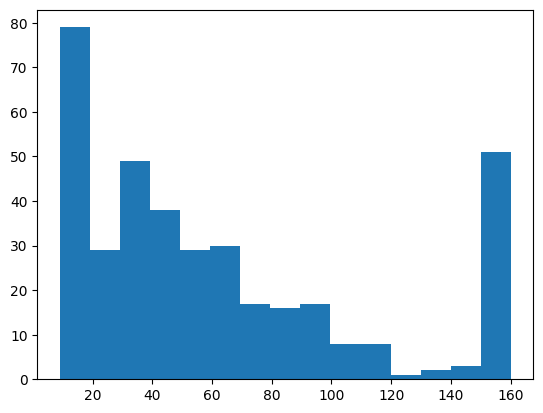

In [128]:
plt.hist(opm, bins=15 )

With the Net Income graph we can see something similar to the one above, only that there are fewer companies that have a low net income value, between 150,000 - 300,000 and there are approximately 100 companies that have a net income of 0.

(array([102.,  30.,  58.,  34.,  47.,  22.,   9.,   8.,   3.,   5.,   3.,
          4.,   2.,   2.,  48.]),
 array([-17482.6       ,   6395.25066667,  30273.10133333,  54150.952     ,
         78028.80266667, 101906.65333333, 125784.504     , 149662.35466667,
        173540.20533333, 197418.056     , 221295.90666667, 245173.75733333,
        269051.608     , 292929.45866667, 316807.30933333, 340685.16      ]),
 <BarContainer object of 15 artists>)

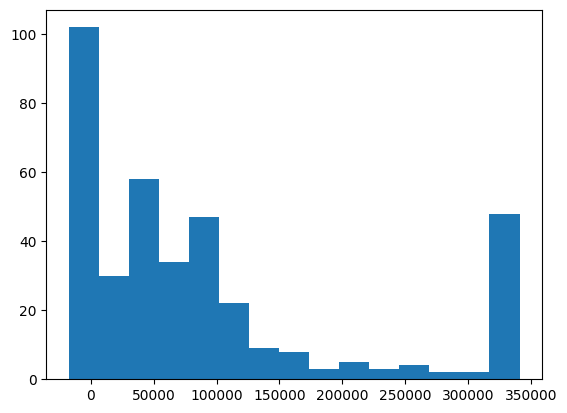

In [129]:
plt.hist(mv, bins=15)

For this last graph we can see that there are many companies or most of them have an operating_profit value of 300000, and there are few that have a value between 0 and 150000.

(array([72., 34., 44., 24., 21., 19., 28., 33., 10.,  5., 87.]),
 array([   302.19146   ,  26961.93405455,  53621.67664909,  80281.41924364,
        106941.16183818, 133600.90443273, 160260.64702727, 186920.38962182,
        213580.13221636, 240239.87481091, 266899.61740545, 293559.36      ]),
 <BarContainer object of 11 artists>)

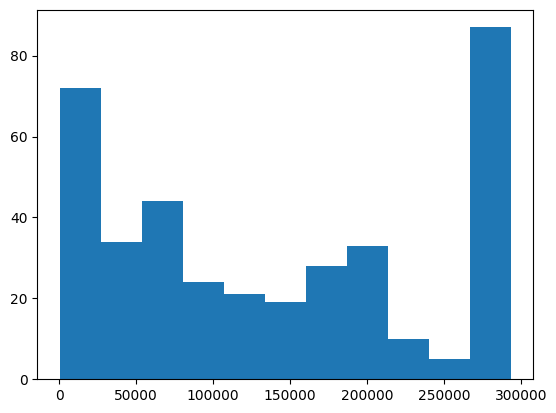

In [130]:
plt.hist(rev, bins=11)

In the following graphs in which we plot the relationship of the independent variables with the dependent variable, we can observe that the 3 graphs are too similar and have a similar shape and structure and this makes sense, since the 3 variables that had the most correlation were taken. with the dependent variable for better modeling.

Do plots to visualize the possible relationship each factor might have with the dependent variable.

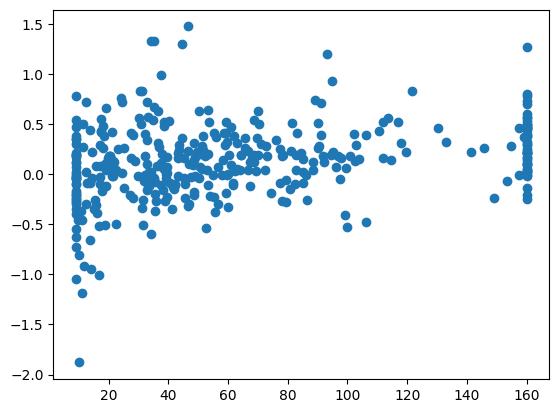

In [131]:
plt.scatter(opm, annual_stock_return)

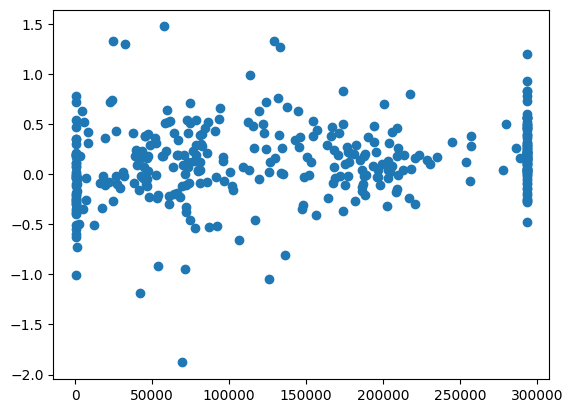

In [132]:
plt.scatter(rev, annual_stock_return)

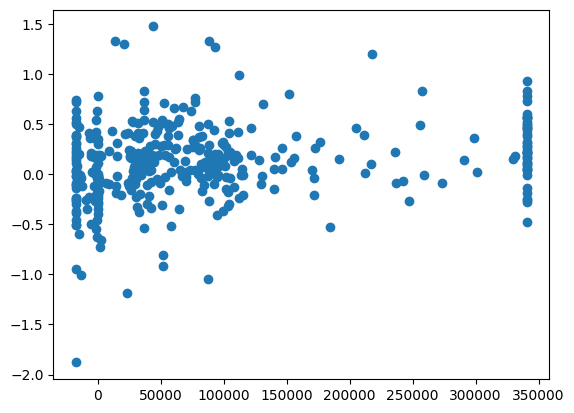

In [133]:
plt.scatter(mv, annual_stock_return)

Show descriptive statistics of these factors

In [134]:
opm.describe()

,originalprice
count,377.000000
mean,62.062399
std,48.415621
min,9.054000
25%,22.430000
50%,48.240000
75%,86.210000
max,160.054400


In [135]:
rev.describe()

,operating_profit
count,377.000000
mean,140079.600716
std,106557.528871
min,302.191460
25%,46793.000000
50%,126139.000000
75%,228700.000000
max,293559.360000


In [136]:
mv.describe()

,net income
count,377.000000
mean,91262.523639
std,113290.531887
min,-17482.600000
25%,415.923004
50%,53149.000000
75%,109700.000000
max,340685.160000


Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model

In [137]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing


First, a modeling was carried out taking into account the sizes of the firms as independent variables against the dependent variable R.

We can observe in the analysis that the size_1 variable has a p value of .75 and the standard error is low for the 2 variables.

In [138]:
import statsmodels.api as sm
y = only_industry['R']

x = only_industry[['size_1','size_2']]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5766
Date:                Fri, 09 Sep 2022   Prob (F-statistic):              0.562
Time:                        09:30:24   Log-Likelihood:                -168.04
No. Observations:                 377   AIC:                             342.1
Df Residuals:                     374   BIC:                             353.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1633      0.143      1.139      0.2

You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

- Multicollinearity is when 2 independent variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0 

- Also we can see that the 2 variables of the sizes have a high correlation with 77%.

In [139]:
x = x.drop(columns=['const'])
corr = x.corr()
corr.style.background_gradient(cmap='coolwarm')

,size_1,size_2
size_1,1.000000,-0.774224
size_2,-0.774224,1.000000


In [140]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {} 
    for feature in features:
        
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]  
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

If we calculate the vif to see if a variable has a VIF > 10 we see that there aren't any.

In [141]:
calculate_vif(df=x, features=['size_1', 'size_2'])

,VIF,Tolerance
size_1,2.4964,0.400577
size_2,2.4964,0.400577


Now we make the regression with the independent variables that we define early.

We can see that the variable that has the most high p value is the net income, so we are going to drop that variable to improve the model.

In [142]:
y = only_industry['R']

x = only_industry[['originalprice','net income', 'operating_profit']]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.130
Date:                Fri, 09 Sep 2022   Prob (F-statistic):             0.0257
Time:                        09:30:24   Log-Likelihood:                -163.94
No. Observations:                 377   AIC:                             335.9
Df Residuals:                     373   BIC:                             351.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0992      0.021  

In [143]:
calculate_vif(df=x, features=['originalprice','net income', 'operating_profit'])

,VIF,Tolerance
originalprice,2.323600,0.430367
net income,1.428807,0.699885
operating_profit,2.056509,0.486261


Adjustments to your model. If there is one or more independent variables (factors or control variables) that were not significant, drop them from your model. You have to run and interpret your final model.

- We drop the net income variable.

In [144]:
y = only_industry['R']

x = only_industry[['originalprice', 'operating_profit']]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.565
Date:                Fri, 09 Sep 2022   Prob (F-statistic):             0.0110
Time:                        09:30:25   Log-Likelihood:                -164.08
No. Observations:                 377   AIC:                             334.2
Df Residuals:                     374   BIC:                             346.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0993      0.021  